<h1><center>Introduction to PySpark</center></h1>

1. PySpark is the Python library for interacting with the Apache Spark framework.
<br /><br />
2. PySpark allows you to process large datasets in a distributed computing environment.
<br /><br />
3. PySpark's primary data structure is the Resilient Distributed Dataset (RDD), which is a collection of elements that can be processed in parallel.
<br /><br />
4. PySpark also has a Dataframe API which is similar to Pandas Dataframe and provides a higher-level abstraction compared to RDDs.
<br /><br />
5. PySpark also provides a SQL API for querying data using SQL syntax.
<br /><br />
6. PySpark can be used in combination with other Python libraries, such as Pandas, NumPy, and Scikit-learn, to perform advanced data analysis tasks.
<br /><br />
7. PySpark can be run using the PySpark shell or integrated into larger Python applications.
<br /><br />
8. PySpark also provides machine learning libraries such as MLlib and ML which are built on top of Dataframe and RDD API respectively.
<br /><br />
9. PySpark's performance is highly dependent on the cluster configuration and resources, and it is important to properly configure and tune the cluster for optimal performance.
<br /><br />
10. PySpark requires knowledge of both Spark and Python.
<br /><br />
11. Spark provides support for running on a cluster and PySpark allows you to interface with it using Python.
<br /><br />
Reference: https://spark.apache.org/docs/

<img src="./Images/Spark_Stack.png" width="450" height="340" style="display=block; margin:auto"/>


Reference: https://runawayhorse001.github.io/

### Installation using Pip

pip install pyspark pandas matplotlib

### Installation using Conda

conda create -n pyspark_env
<br /><br />
conda activate pyspark_env
<br /><br />
conda install -c conda-forge pyspark  # can also add "python=3.8 some_package [etc.]" here

For manually downloading and more reference refer to: https://spark.apache.org/docs/latest/api/python/getting_started/install.html



<h1><center>Loading Dataframe using PySpark</center></h1>

In [1]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("DataFrames").getOrCreate()

# Create a DataFrame from a CSV file
df = spark.read.csv("./dataset/House_area_price.csv", inferSchema=True, header=True)

23/01/22 15:46:10 WARN Utils: Your hostname, arpit-Z590-UD-AC resolves to a loopback address: 127.0.1.1; using 10.90.184.108 instead (on interface enp8s0)
23/01/22 15:46:10 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/01/22 15:46:10 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/01/22 15:46:10 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In this example, we first import the necessary modules from the PySpark library. <br /><br />
We then create a SparkSession object, which is the entry point to using Spark functionality. <br /><br />
Next, we use the read method of the SparkSession object to read a CSV file and create a DataFrame.<br /><br />

inferSchema=True <br /><br />is used to automatically infer the data types of the columns in the DataFrame, based on the data in the CSV file.<br /><br />
header=True <br /><br />is used to indicate that the first row of the CSV file contains the column names.<br /><br />

Once the DataFrame is created, we can perform various operations on it such as filter, groupBy, select, etc.

In the below  example, show(5) is used to show first 5 rows of dataframe, printSchema() is used to print the schema of dataframe<br />
select and filter are used to select specific columns and filter rows based on conditions respectively.

In [2]:
#print the first 5 rows of dataframe
df.show(5)

#print the schema of the dataframe
df.printSchema()

#select only specific columns
df.select("price","area").show(5)

#filter rows based on a condition
value = 3150000
df.filter(df["price"] > value).show(5)

+-------+----+
|  price|area|
+-------+----+
|3150000|1650|
|1890000|1700|
|2275000|1836|
|4340000|1905|
|2240000|1950|
+-------+----+
only showing top 5 rows

root
 |-- price: integer (nullable = true)
 |-- area: integer (nullable = true)

+-------+----+
|  price|area|
+-------+----+
|3150000|1650|
|1890000|1700|
|2275000|1836|
|4340000|1905|
|2240000|1950|
+-------+----+
only showing top 5 rows

+-------+----+
|  price|area|
+-------+----+
|4340000|1905|
|3430000|1950|
|3850000|2015|
|3500000|2135|
|4200000|2145|
+-------+----+
only showing top 5 rows



<h1><center>Creating Dataframe using PySpark</center></h1>


### 1. From a list of rows with explicit schema:

In [3]:
from pyspark.sql import SparkSession, Row
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

# Create a SparkSession
spark = SparkSession.builder.appName("DataFrame Example").getOrCreate()

# Define the schema for the DataFrame
schema = StructType([
    StructField("name", StringType()),
    StructField("age", IntegerType())
])

# Create a list of rows
rows = [Row(name="Alice", age=25), Row(name="Bob", age=30), Row(name="Charlie", age=35)]

# Create a DataFrame from the list of rows and the schema
df = spark.createDataFrame(rows, schema)

# Print the DataFrame
df.show()


23/01/22 15:46:13 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
+-------+---+
|   name|age|
+-------+---+
|  Alice| 25|
|    Bob| 30|
|Charlie| 35|
+-------+---+



### 2. From a pandas DataFrame with explicit schema

In [4]:
import pandas as pd
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("DataFrame Example").getOrCreate()

# Create a pandas DataFrame
pdf = pd.DataFrame({"name": ["Alice", "Bob", "Charlie"], "age": [25, 30, 35]})

# Define the schema for the DataFrame
schema = StructType([
    StructField("name", StringType()),
    StructField("age", IntegerType())
])

# Create a DataFrame from the pandas DataFrame and the schema
df = spark.createDataFrame(pdf,schema)

# Print the DataFrame
df.show()

+-------+---+
|   name|age|
+-------+---+
|  Alice| 25|
|    Bob| 30|
|Charlie| 35|
+-------+---+



### 3. From RDD consists of list of tuples with explicit schema:

In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

# Create a SparkSession
spark = SparkSession.builder.appName("DataFrame Example").getOrCreate()

# Create an RDD of tuples
rdd = spark.sparkContext.parallelize([("Alice", 25), ("Bob", 30), ("Charlie", 35)])

# Define the schema for the DataFrame
schema = StructType([
    StructField("name", StringType()),
    StructField("age", IntegerType())
])

# Create a DataFrame from the RDD and the schema
df = spark.createDataFrame(rdd, schema)

# Print the DataFrame
df.show()


+-------+---+
|   name|age|
+-------+---+
|  Alice| 25|
|    Bob| 30|
|Charlie| 35|
+-------+---+



<h1><center>Viewing Data</center></h1>

In [6]:
# 1. Showing the first n rows of the DataFrame:
n = int(input('Enter the number of rows to display:'))
df.show(n)

+-----+---+
| name|age|
+-----+---+
|Alice| 25|
|  Bob| 30|
+-----+---+
only showing top 2 rows



In [7]:
# 2.1 Show the entire dataframe
df.show()

+-------+---+
|   name|age|
+-------+---+
|  Alice| 25|
|    Bob| 30|
|Charlie| 35|
+-------+---+



In [8]:
# 2.2 Show the first 2 rows
df.show(2)

+-----+---+
| name|age|
+-----+---+
|Alice| 25|
|  Bob| 30|
+-----+---+
only showing top 2 rows



In [9]:
# 3. Print the schema of the DataFrame:
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)



In [10]:
# 4. Count the number of rows in the DataFrame:
df.count()

3

In [11]:
# 5. Describe the DataFrame
df.describe().show()

+-------+-------+----+
|summary|   name| age|
+-------+-------+----+
|  count|      3|   3|
|   mean|   null|30.0|
| stddev|   null| 5.0|
|    min|  Alice|  25|
|    max|Charlie|  35|
+-------+-------+----+



In [12]:
# 6. Select specific columns from the DataFrame:
df.select("name", "age").show()

+-------+---+
|   name|age|
+-------+---+
|  Alice| 25|
|    Bob| 30|
|Charlie| 35|
+-------+---+



In [13]:
# 7. Filter the DataFrame based on a condition:
value = 30
df.filter(df["age"] > value).show()

+-------+---+
|   name|age|
+-------+---+
|Charlie| 35|
+-------+---+



<h1><center>Selecting and Accessing Data</center></h1>

In [14]:
# 1. Selecting specific columns from the DataFrame:
df.select("name", "age")

DataFrame[name: string, age: int]

In [15]:
# 2. Selecting columns and renaming them
df.selectExpr("age as age_", "name as name_")

DataFrame[age_: int, name_: string]

In [16]:
# 3. Grouping the DataFrame by one or more columns: 
df.groupBy("name", "age").mean()
# This will group the DataFrame by the name and age columns and return the mean value for each group.

DataFrame[name: string, age: int, avg(age): double]

In [17]:
# 4. Sorting the DataFrame by one or more columns:
df.sort(df["age"].desc(),df["age"].asc())

DataFrame[name: string, age: int]

In [18]:
# 5. Accessing individual elements in the DataFrame
df.collect()

[Row(name='Alice', age=25),
 Row(name='Bob', age=30),
 Row(name='Charlie', age=35)]

In [19]:
# 6. Accessing individual elements in the DataFrame
df.collect()

[Row(name='Alice', age=25),
 Row(name='Bob', age=30),
 Row(name='Charlie', age=35)]

In [20]:
# 7. Accessing individual column of a row:
row = df.first()
print(row.age)

25


In [21]:
# 8. Accessing elements in the DataFrame using indexing
n = 1
df.take(n)

[Row(name='Alice', age=25)]

#### CSV is straightforward and easy to use. Parquet and ORC are efficient and compact file formats to read and write faster.

#### There are many other data sources available in PySpark such as JDBC, text, binaryFile, Avro, etc. 

<br /><br />
<h1><center>User Defined Functions (UDF)</center></h1>



Useful links:

Pandas with Spark: https://spark.apache.org/docs/latest/api/python/getting_started/quickstart_ps.html

PySpark provides a pandas_udf module to define and run Pandas UDFs (user-defined functions) in PySpark. The pandas_udf module allows you to define UDFs that take and return Pandas DataFrames, instead of the regular PySpark DataFrames. This can be useful when working with large datasets and you want to use the power of Pandas for data manipulation.


UDFs, or User Defined Functions, allow for the expansion of the capabilities of a framework by allowing for the reuse of functions on multiple DataFrames. For instance, if you want to capitalize the first letter of each word in a name string, and the PySpark framework does not have a built-in function for this, you can create a UDF to do this and use it on multiple DataFrames as needed. Once created, UDFs can be applied to multiple DataFrames and SQL expressions.

In [22]:
# UDFs using SQL PySpark
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Define the UDF
capitalize_udf = udf(lambda s: " ".join([w.capitalize() for w in s.split(" ")]), StringType())

# Create a DataFrame
df = spark.createDataFrame([("john doe",), ("jane smith",)], ["name"])

# Apply the UDF to the DataFrame
df = df.withColumn("capitalized_name", capitalize_udf(df["name"]))

df.show()


+----------+----------------+
|      name|capitalized_name|
+----------+----------------+
|  john doe|        John Doe|
|jane smith|      Jane Smith|
+----------+----------------+



In [23]:
# UDFs using Pandas API in PySpark
from pyspark.sql.functions import pandas_udf
from pyspark.sql.types import StringType

# Define the UDF
@pandas_udf(StringType())
def capitalize_udf(s):
    return s.apply(lambda x: " ".join([w.capitalize() for w in x.split(" ")]))

# Create a DataFrame
df = spark.createDataFrame([("john doe",), ("jane smith",)], ["name"])

# Apply the UDF to the DataFrame
df = df.withColumn("capitalized_name", capitalize_udf(df["name"]))

df.show()


+----------+----------------+
|      name|capitalized_name|
+----------+----------------+
|  john doe|        John Doe|
|jane smith|      Jane Smith|
+----------+----------------+



The above example uses the @pandas_udf decorator to define the UDF, which takes the return type of the UDF as its argument. The UDF capitalize_udf takes a pandas.Series and applies the lambda function that capitalizes the first letter of each word in the string. The UDF is then applied to the DataFrame using the withColumn method and the result is stored in a new column "capitalized_name".

It is important to note that Pandas UDFs are only available in the pyspark.sql.functions module of PySpark version 2.4 or later, and also need to be executed on the same version of pandas as the version of pyspark being used.

<br /><br /><br /><br /><br />
<h1><center>Linear Regression Example</center></h1>

## 1. Session Creation

In this step, we will create a spark session that will be used for all the subsequent steps.

In [24]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("LinearRegression").getOrCreate()

23/01/22 15:46:22 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


## 2. Data Wrangling

PySpark Data Wrangling: the key concepts and techniques for working with data in PySpark, including data cleaning, transformation, and feature engineering.

1. Data cleaning can be done using PySpark DataFrame API, for example, to remove missing values, we can use the dropna() function, or to fill missing values, the fillna() function.
2.  Data transformation can be done using PySpark DataFrame API, for example, to normalize the data, we can use the StandardScaler() function from the ml.feature module.
3. Feature engineering is the process of creating new features from the existing ones, it can be done using PySpark DataFrame API.

In this step, we are loading the data, dropping the missing values, creating a vector assembler to convert the input columns into a single vector column, and splitting the data into training and test sets.

In [25]:
# load the data
data = spark.read.csv('./dataset/House_area_price.csv', header=True, inferSchema=True)

# drop missing values
data = data.dropna()

# create a vector assembler to convert the input columns into a single vector column
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=['area'], outputCol='features')
data = assembler.transform(data)

# split the data into training and test sets
train_data, test_data = data.randomSplit([0.8, 0.2])


## Uncomment this line
#train_data.select("col3").show()

## 3. Model Training and Evaluation

In this step, we are creating the linear regression model, fitting it to the training data, making predictions on the test data, and evaluating the model's performance.

In [26]:
# create the linear regression model
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol='features', labelCol='price')

# fit the model to the training data
model = lr.fit(train_data)

# make predictions on the test data
predictions = model.transform(test_data)

# evaluate the model's performance
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol='price', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)
print('Root Mean Squared Error:', rmse)

23/01/22 15:46:23 WARN Instrumentation: [939b9218] regParam is zero, which might cause numerical instability and overfitting.
23/01/22 15:46:23 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/01/22 15:46:23 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
23/01/22 15:46:23 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK
Root Mean Squared Error: 1622056.587837772


## 4. Visualisation

In this step, we are converting the predictions to a pandas dataframe, and plotting the predictions versus the actual values.

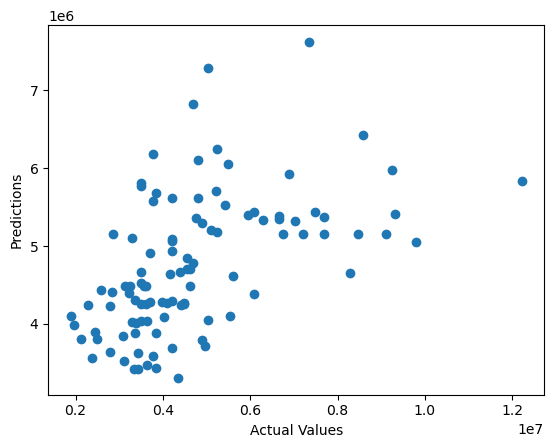

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# convert the predictions to a pandas dataframe
predictions_pd = predictions.toPandas()

# plot the predictions versus the actual values
plt.scatter(predictions_pd['price'], predictions_pd['prediction'])
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()


<br /><br /><br /><br /><br />
<h1><center>Workshop Task (Classification)</center></h1>


Perform classification on Iris Dataset which is available for download from the UCI Machine Learning Repository. 
It should include:
1. Load the data into a PySpark DataFrame (https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)
2. Prepare the data for classification. This typically involves selecting the features and labels, and possibly scaling or transforming the data. 
3. Split the data into training (70%) and test set (30%)
4. Train a classification model using the training data using Random Forest classifier (https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.ml.classification.RandomForestClassifier.html)
5. Predict the labels of the test data
6. Evaluate the model performance using any of the classification metrics like accuracy, f1 score, precision, recall etc. (https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.ml.evaluation.MulticlassClassificationEvaluator.html?highlight=multiclassclassificationevaluator#pyspark.ml.evaluation.MulticlassClassificationEvaluator)
